In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pickle
from matplotlib import pyplot as plt
import numpy as np
import sys
import os
from sklearn.cluster import DBSCAN

In [3]:
import os
import sys

# Get the current directory
current_dir = os.path.dirname(os.path.abspath('__file__'))
print('current_dir:', current_dir)

# Get the parent directory
parent_dir = os.path.dirname(os.path.dirname(current_dir))
print('parent_dir:', parent_dir)

# Get the segment_clustereuse directory
segment_clustereuse_dir = os.path.join(parent_dir, 'segment_clustereuse')
print('segment_clustereuse_dir:', segment_clustereuse_dir)

# Add the parent directory to sys.path
sys.path.append(segment_clustereuse_dir)
sys.path.append(parent_dir)

current_dir: /Volumes/CrucialX/hlybokyi-potik/segment_clustereuse/test
parent_dir: /Volumes/CrucialX/hlybokyi-potik
segment_clustereuse_dir: /Volumes/CrucialX/hlybokyi-potik/segment_clustereuse


In [4]:
from segment_clustereuse.dsa import TDFParams
from segment_clustereuse.spectral_clustereuse import get_spectral_cluster, plot_segments_with_labels, get_spectral_embedding
from segment_clustereuse.sim_model import get_similarity_matrix, theta, explain_similarity
from path_prefix import PATH_PREFIX

In [5]:
# Load the segments from the pickle file
with open(PATH_PREFIX + '/data/segments/flight_segments_1716508800.pickle', 'rb') as f:
    segments_file = pickle.load(f)
    print('Segments file loaded')
    
seg_from_lat = segments_file['seg_from_lat']
seg_from_lon = segments_file['seg_from_lon']
seg_to_lat = segments_file['seg_to_lat']
seg_to_lon = segments_file['seg_to_lon']

# Convert deque to np.array
seg_from_lat = np.array(seg_from_lat)
seg_from_lon = np.array(seg_from_lon)
seg_to_lat = np.array(seg_to_lat)
seg_to_lon = np.array(seg_to_lon)

Segments file loaded


In [6]:
np.random.seed(42)
indices = np.random.choice(len(seg_from_lat), 100, replace=False).tolist()
seg_from_lat = seg_from_lat[indices]
seg_from_lon = seg_from_lon[indices]
seg_to_lat = seg_to_lat[indices]
seg_to_lon = seg_to_lon[indices]

print(f'Segments are sampled')

Segments are sampled


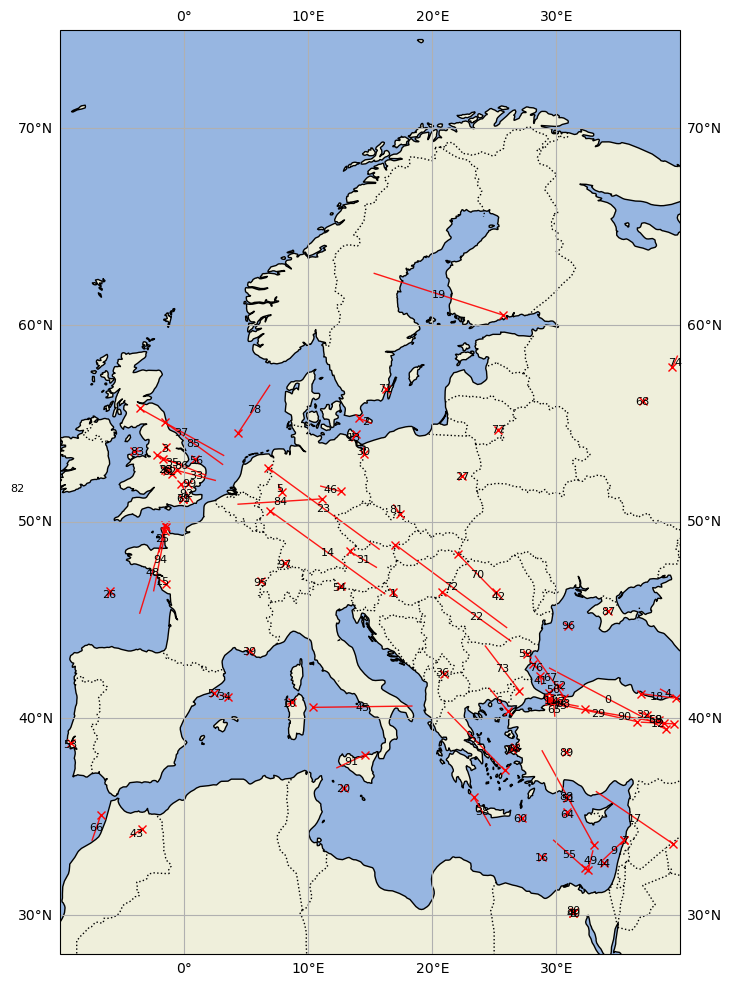

In [21]:
plot_segments_with_labels(seg_from_lat, seg_from_lon, seg_to_lat, seg_to_lon, cluster_labels=None, filter=None)

In [22]:
the = {
        'psi_bar': TDFParams(tau=0.01, alpha=12., x0=100.),  # psi_bar = 1 - psi, where psi is the cosine similarity
        'wO': TDFParams(tau=0.01, alpha=24., x0=1.),  # weight of overlap
        'wH': TDFParams(tau=0.01, alpha=24., x0=1.),   # weight of horizontal separation
        'O': TDFParams(tau=0.9, alpha=6., x0=100.),   # overlap
        'H': TDFParams(tau=0.005, alpha=60., x0=100.)   # horizontal separation
}

In [23]:
explain_similarity(seg_from_lat, seg_from_lon, seg_to_lat, seg_to_lon, the, 78, 45)

Segment 1: [0.99361608 0.12005197] to [0.95098979 0.07543858]
Segment 2: [0.70887097 0.32014059] to [0.70769884 0.18074022]
{'tdf(psi_bar)': array(0.74065934), 'tdf(wO)': array(5.48576262e-05), 'tdf(wH)': array(5.48576262e-05), 'tdf(O)': array(65.71246272), 'tdf(H)': array(3.55467386e-06), 'psi_bar': np.float64(0.41878205600949103), 'O': np.float64(0.9699802645147514), 'H': 0.2908736237905852}
Similarity between segment 78 and segment 45 is 0.24808805746672433


In [24]:
explain_similarity(seg_from_lat, seg_from_lon, seg_to_lat, seg_to_lon, the, 45, 14)

Segment 1: [0.70887097 0.32014059] to [0.70769884 0.18074022]
Segment 2: [0.80851876 0.28210844] to [0.88204215 0.12084009]
{'tdf(psi_bar)': array(9.19797551), 'tdf(wO)': array(0.00846028), 'tdf(wH)': array(0.00846028), 'tdf(O)': array(100.), 'tdf(H)': array(0.00291903), 'psi_bar': np.float64(0.20884889832926967), 'O': np.float64(0.5653221766759781), 'H': 0.17902790195027604}
Similarity between segment 45 and segment 14 is 3.348009244906738


100%|██████████| 100/100 [00:00<00:00, 152.74it/s]


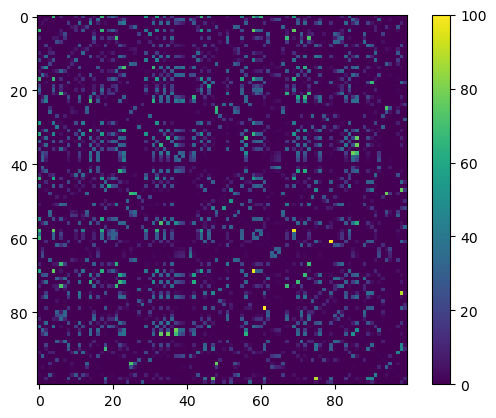

In [12]:
similarity_matrix = get_similarity_matrix(seg_from_lat, seg_from_lon, seg_to_lat, seg_to_lon, the)
plt.imshow(similarity_matrix)
plt.colorbar()
plt.show()

/Users/thinhhoang/miniforge3/envs/deepflow/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


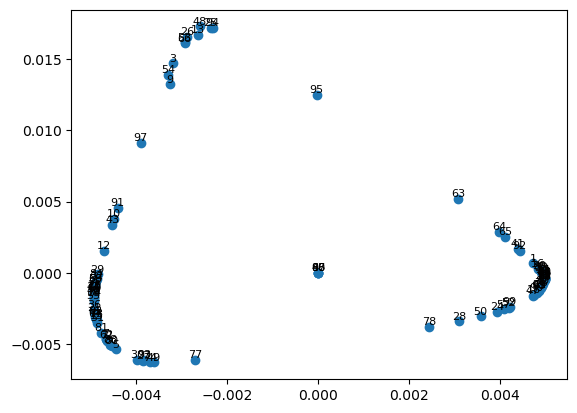

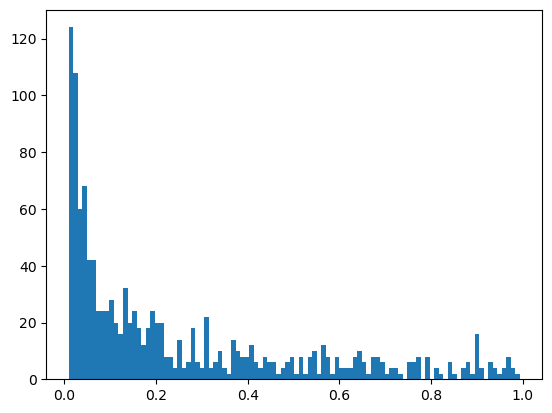

In [13]:
embeddings = get_spectral_embedding(similarity_matrix)
plt.scatter(embeddings[:, 0], embeddings[:, 1])
# Add a text label to the point with the index of the segment
for i, txt in enumerate(range(len(seg_from_lat))):
    plt.text(embeddings[i, 0], embeddings[i, 1], str(txt), fontsize=8, ha='center', va='bottom')
plt.show()
plt.hist(similarity_matrix[(similarity_matrix > 0.01) & (similarity_matrix < 1)], bins=100)
plt.show()

In [17]:
np.argmax(similarity_matrix[45, :])

np.int64(90)